In [1]:
import sys
sys.path.append('..')

In [2]:
from dali.core import LSTM, Mat, LSTMState, StackedLSTM

import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
s = LSTMState(Mat([1,2,3]), Mat([4,2,1]))
print(s.dtype)
print(s.memory.w)
print(s.hidden.w)

float32
[[ 1.  2.  3.]]
[[ 4.  2.  1.]]


In [4]:
l = LSTM(2, 5)

In [5]:
i = Mat([[1, 2]])
h = l.initial_states()
print(i.__repr__())
print(h.hidden.__repr__())
print(h.memory.__repr__())
h = l.activate(i, h)
print(h.hidden.__repr__())
print(h.memory.__repr__())

[
    [  1.000   2.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.150   0.075   0.142  -0.004  -0.001]
]

[
    [  0.212   0.312   0.254  -0.008  -0.002]
]



In [8]:
print("Activate sequence for 3 different inputs states and one hidden states")
r1 = l.activate_sequence([Mat(3, 2) for i in range(10)], l.initial_states()).memory
print(r1.w)
print("Activate sequence for 3 different hidden states and three different inputs")
r2 = l.activate_sequence([Mat(3, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r2.w)
print("Activate sequence for 3 different hidden states and one input (!)")
r3 = l.activate_sequence([Mat(1, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r3.w)

Activate sequence for 3 different inputs states and one hidden states
[[ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]]
Activate sequence for 3 different hidden states and three different inputs
[[ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]]
Activate sequence for 3 different hidden states and one input (!)
[[ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]
 [ 0.31556997 -0.05376546 -0.0430177  -0.00521236 -0.29317772]]


In [9]:
INPUTS = [2,3]
HIDDEN_SIZE = 5
NUM_CHILDREN = 3

In [10]:
l = LSTM(INPUTS, HIDDEN_SIZE, NUM_CHILDREN, memory_feeds_gates=True)

In [11]:
idx = random.randint(0, len(l.parameters()) - 1)
print(l.cell_layer)
print(l.forget_layers)
print(l.hidden_size)
print(l.input_sizes)
print(l.input_layer)
print(l.num_children)
print(l.memory_feeds_gates)
print(l.parameters()[3].w)
with open("/tmp/lstm_test_dali.dali", "wb") as f:
    pickle.dump(l,f)

<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[ 0.36870342 -0.03744119 -0.00326931  0.09401595 -0.29351875]]


In [4]:
import pickle
from test_dali import LSTM, Mat


with open("/tmp/lstm_test_dali.dali", "rb") as f:
    l_pickled = pickle.load(f)
print("==== PICKLED ====")
print(l_pickled.cell_layer)
print(l_pickled.forget_layers)
print(l_pickled.hidden_size)
print(l_pickled.input_sizes)
print(l_pickled.input_layer)
print(l_pickled.num_children)
print(l_pickled.memory_feeds_gates)
print(l_pickled.parameters()[3].w)

ImportError: No module named 'test_dali'

In [13]:
hs = [l_pickled.initial_states() for _ in range(l_pickled.num_children)]
i = [Mat(1, ipt) for ipt in l_pickled.input_sizes]

h_combined = l_pickled.activate(i, hs)
print(h_combined.hidden.__repr__())
print(h_combined.memory.__repr__())

[
    [  0.028  -0.025  -0.020  -0.008  -0.049]
]

[
    [  0.060  -0.047  -0.039  -0.014  -0.102]
]



In [7]:
l.Wcells_to_forgets[0]

NameError: name 'l' is not defined

In [8]:
l = StackedLSTM([1,2], [5,4], shortcut=True)

In [9]:
l.activate(
    [
        Mat(5,1),
        Mat(5,2),
    ], l.initial_states()
)

In [10]:
print(l.cells[0].cell_layer)
print(l.cells[0].forget_layers)
print(l.cells[0].hidden_size)
print(l.cells[0].input_sizes)
print(l.cells[0].input_layer)
print(l.cells[0].num_children)
print(l.cells[0].memory_feeds_gates)
print(l.cells[0].parameters()[5].w)
print(l.shortcut)
with open("/tmp/stacked_lstm_test_lol.dali", "wb") as f:
    pickle.dump(l,f)

<StackedInputLayer in=[1, 2, 5], out=5>
[<StackedInputLayer in=[1, 2, 5], out=5>]
5
[1, 2]
<StackedInputLayer in=[1, 2, 5], out=5>
1
False
[[-0.16443005  0.22159122  0.24860647  0.32551721  0.01914411]
 [ 0.19727443  0.26258233  0.17914623 -0.17491819  0.1341583 ]]
True


In [12]:
import pickle
from dali.core import StackedLSTM, Mat

with open("/tmp/stacked_lstm_test_lol.dali", "rb") as f:
    l_pickled = pickle.load(f)
print("==== PICKLED ====")

print(l_pickled.cells[0].cell_layer)
print(l_pickled.cells[0].forget_layers)
print(l_pickled.cells[0].hidden_size)
print(l_pickled.cells[0].input_sizes)
print(l_pickled.cells[0].input_layer)
print(l_pickled.cells[0].num_children)
print(l_pickled.cells[0].memory_feeds_gates)
print(l_pickled.cells[0].parameters()[5].w)
print(l.shortcut)

==== PICKLED ====
<StackedInputLayer in=[1, 2, 5], out=5>
[<StackedInputLayer in=[1, 2, 5], out=5>]
5
[1, 2]
<StackedInputLayer in=[1, 2, 5], out=5>
1
False
[[-0.16443005  0.22159122  0.24860647  0.32551721  0.01914411]
 [ 0.19727443  0.26258233  0.17914623 -0.17491819  0.1341583 ]]
True


In [10]:
l_pickled.initial_states()

NameError: name 'l_pickled' is not defined

In [21]:
l_pickled.cells

[<LSTM inputs=[1, 2], hidden_size=5>, <LSTM inputs=[5], hidden_size=4>]

In [5]:
l_pickled.activate([
    Mat([[1]]),
    Mat([[1, 2]])
], l_pickled.initial_states())

In [4]:
l_pickled.activate([
    Mat([[1]]),
    Mat([[1, 2]])
], [])

RuntimeError: Activating LSTM stack of size 2 with different number of states 0

In [23]:
h1 = l_pickled.cells[0].activate(
    [Mat([[1]]),
    Mat([[1, 2]])],
    l_pickled.cells[0].initial_states()
)
h2 = l_pickled.cells[1].activate(
    h1.hidden,
    l_pickled.cells[1].initial_states()
)

In [24]:
h1.hidden

[
    [ -0.007  -0.068  -0.095   0.145  -0.057]
]

In [ ]:
new_state = l_pickled.activate([
    Mat([[1]]),
    Mat([[1, 2]])
],
l_pickled.initial_states(),
0.5
)
new_state[0].memory

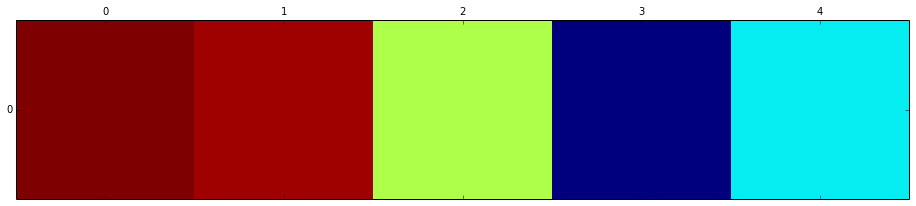

In [13]:
plt.matshow(l_pickled.cells[0].forget_layers[0].matrices[0].w)

In [33]:
?l.activate_sequence